### Second Amendment
A **well regulated** Militia, being necessary to the security of a free State, the right of the people to keep and bear Arms, shall not be infringed.

## Import dependencies

In [88]:
import pandas as pd
from pathlib import Path
import sys

# Ignnore warning
import warnings
warnings.simplefilter(action='ignore')

# Local modules
sys.path.append("Local_Modules/")
import codebook
from codebook import replace_code_by_value, get_distribution
from data_exploration import dataset_info

ImportError: cannot import name 'get_distribution' from 'codebook' (c:\Users\User\OneDrive\Documents\10 - Career\Monash University\Data Analytics Bootcamp\Project 4\Shootings\Local_Modules\codebook.py)

## Load Data

In [4]:
cases_df = pd.read_csv(Path('clean_data/clean_cases.csv'))
firearms_df = pd.read_csv(Path('clean_data/clean_firearms.csv'))
shooters_df = pd.read_csv(Path('clean_data/clean_shooters.csv'))

# Questions

## Question 1: what are the states with the most and fewest shootings

In [5]:
attacks_per_state_df = cases_df.groupby('State')['Case #'].count().sort_values(ascending=False)

Nt = 7

print(f"The Top {Nt} states for mass shootings are:")
display(attacks_per_state_df.head(Nt))

print(f"The Bottom {Nt} states for mass shootings are:")
display(attacks_per_state_df.tail(Nt))

The Top 7 states for mass shootings are:


State
CA    30
TX    21
FL    13
NY    10
CO     9
PA     8
WA     8
Name: Case #, dtype: int64

The Bottom 7 states for mass shootings are:


State
RI    1
NH    1
DC    1
NE    1
UT    1
MA    1
MD    1
Name: Case #, dtype: int64

### Follow up questions
- More people in a state = more shootings?
- Political orientation
- Views on gun in the state
- Background checks

## Question 2: What are some common traits (background) of shooters?

### Most common race and gender

In [7]:
stat_df = get_distribution(shooters_df, 'Gender', codebook.codes_shooter_background_gender)
stat_df

,Gender,Percent
Male,187,96.891192
Female,4,2.072539
Non-Binary,1,0.518135
Transgender,1,0.518135


In [8]:
stat_df = get_distribution(shooters_df, 'Race', codebook.codes_shooter_background_race)
stat_df

,Race,Percent
White,103,53.367876
Black,40,20.725389
Latinx,17,8.808290
Asian,13,6.735751
Middle Eastern,9,4.663212
Unknown,8,4.145078
Native American,3,1.554404


### Immigrants status and religion

In [9]:
stat_df = get_distribution(shooters_df, 'Immigrant', codebook.codes_shooter_background_immigrant)
stat_df

,Immigrant,Percent
No,162,83.937824
Yes,30,15.544041
Unknown,1,0.518135


In [10]:
stat_df = get_distribution(shooters_df, 'Religion', codebook.codes_shooter_background_religion)
stat_df

,Religion,Percent
None,119,61.658031
Christian,56,29.015544
Muslim,9,4.663212
Other,6,3.108808
Buddhist,3,1.554404


# Question 3: mental illness & Depression
Source: https://worldpopulationreview.com/state-rankings/mental-health-statistics-by-state

In [11]:
csv = Path('raw_data/mental-health-statistics-by-state-[updated-may-2023].csv')
mentalillness_df = pd.read_csv(csv)

In [12]:
mentalillness_df.head()

,state,RatesOfMentalIllness,adultsWithAnxietyOrDepresion,adultsWithSevereMentalIllness,overallMentalHealthStandingYouthAdults
0,Utah,29.68,32.1,6.3,42
1,Oregon,27.33,32.6,5.7,45
2,West Virginia,26.05,37.9,5.8,37
3,Kansas,26.02,32.0,5.7,40
4,Oklahoma,25.59,33.9,5.4,32


In [13]:
stat_df = get_distribution(shooters_df, 'Mental Illness', codebook.codes_shooter_health_illness)
stat_df

,Mental Illness,Percent
0,60,31.088083
4,46,23.834197
2,31,16.062176
1,30,15.544041
"1, 2",17,8.808290
3,9,4.663212


In [14]:
codebook.codes_shooter_health_illness

{0: 'No evidence',
 1: 'Mood disorder',
 2: 'Thought disorder',
 3: 'Other psychiatric disorder',
 4: 'Indication of psychiatric disorder but no diagnosis'}

In [15]:
shooter_with_mental_illness = shooters_df.loc[shooters_df['Mental Illness']!='0','Mental Illness'].count()
shooter_without_mental_illness = shooters_df.loc[shooters_df['Mental Illness']=='0','Mental Illness'].count()

In [16]:
total_shooter = shooter_without_mental_illness + shooter_with_mental_illness
shooter_mentalillness_rate = 100*shooter_with_mental_illness/total_shooter
shooter_mentalillness_rate

68.9119170984456

In [17]:
national_mental = mentalillness_df['RatesOfMentalIllness'].mean()
national_mental

21.9246

In [18]:
print(f"Someone with a mental illness is {shooter_mentalillness_rate/national_mental:.2f}x more likely to commit a mass shooting/")

Someone with a mental illness is 3.14x more likely to commit a mass shooting/


Text(0, 0.5, '% of adults with mental illness')

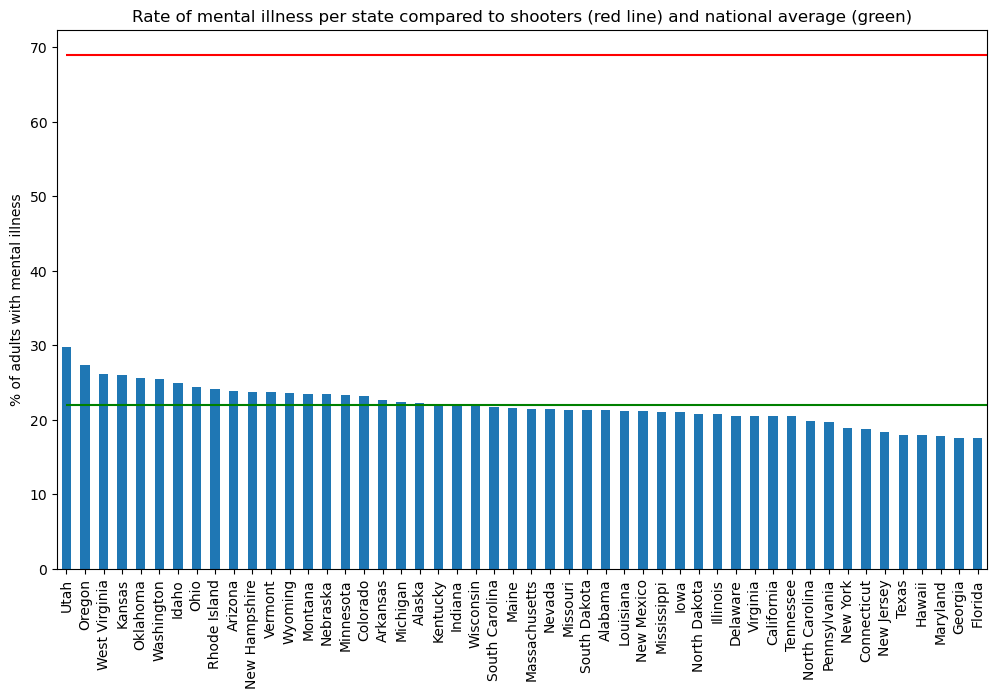

In [19]:
import matplotlib.pyplot as plt

mentalillness_df.plot.bar(x = 'state', y='RatesOfMentalIllness', figsize = (12,7),legend = False)
plt.hlines(shooter_mentalillness_rate,0,50,'red')
plt.hlines(national_mental,0,50,'green')
plt.title('Rate of mental illness per state compared to shooters (red line) and national average (green)')
plt.xlabel('')
plt.ylabel("% of adults with mental illness")

## Depression

In [20]:
from data_exploration import find_keyword_in_list
c = find_keyword_in_list('Depressed',shooters_df.columns)
c

['Notably Depressed Mood']

In [21]:
stat_df = get_distribution(shooters_df, 'Notably Depressed Mood', codebook.codes_shooter_crisis_depressed)
stat_df

,Notably Depressed Mood,Percent
No evidence,134,69.430052
Yes,59,30.569948


In [22]:
shooter_depression = stat_df['Percent'][1]
shooter_depression

30.569948186528496

In [23]:
national_depression = mentalillness_df['adultsWithAnxietyOrDepresion'].mean()
national_depression

31.433999999999997

## Depression is not a good indicator

Text(0, 0.5, '% of adults with depression')

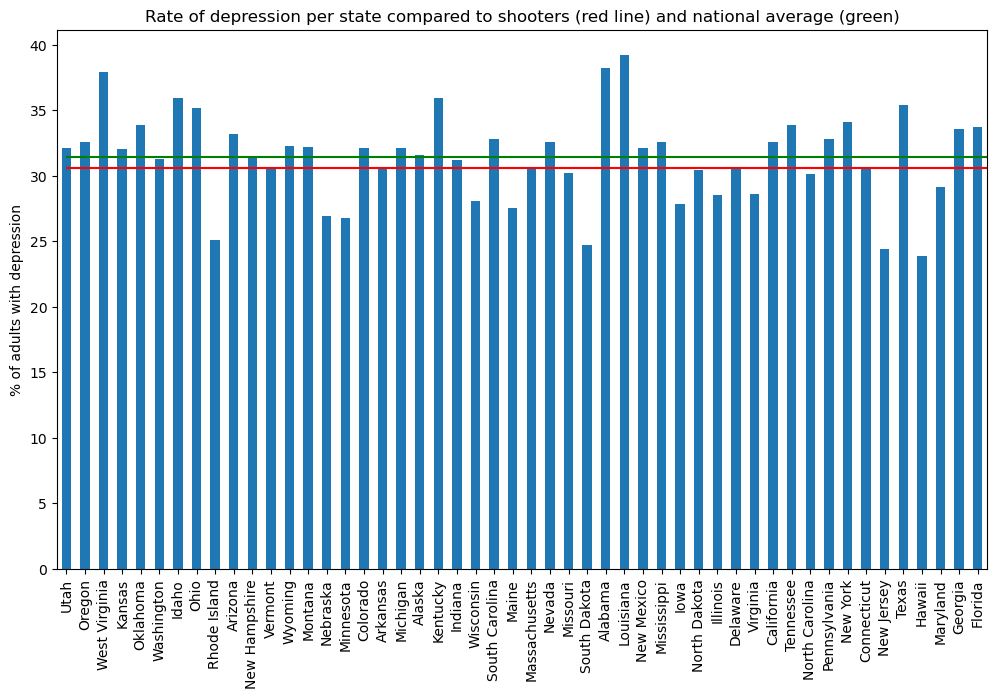

In [24]:
import matplotlib.pyplot as plt

mentalillness_df.plot.bar(x = 'state', y='adultsWithAnxietyOrDepresion', figsize = (12,7),legend = False)
plt.hlines(shooter_depression,0,50,'red')
plt.hlines(national_depression,0,50,'green')
plt.title('Rate of depression per state compared to shooters (red line) and national average (green)')
plt.xlabel('')
plt.ylabel("% of adults with depression")

## Parameters to look at in priority
### Shooter
1. Gender
2. Race
3. Immigrant
4. Age

## Domestic violence
Source: https://worldpopulationreview.com/state-rankings/domestic-violence-by-state

In [25]:
csv = Path('raw_data/domestic-violence-by-state-2023.csv')
domestic_df = pd.read_csv(csv)
domestic_df = domestic_df.rename(columns={'percWomen': 'againstWomen','percMen': 'againstMen'})
domestic_df.head(3)

,state,againstWomen,againstMen
0,Kentucky,45.3,35.5
1,Nevada,43.8,32.8
2,Alaska,43.3,30.2


In [26]:
csv = Path('raw_data/crime-rate-by-state-[updated-august-2022].csv')
crime_df = pd.read_csv(csv)
crime_df.head(3)

,state,pop2020,reported,rate,violent,violentRate,nonViolent,nonViolentRate
0,District of Columbia,670868,14113,7985.932,7127,999.837,49798,6986.095
1,New Mexico,2118390,22077,6462.032,16393,778.277,119718,5683.754
2,Louisiana,4651664,35473,6408.216,29704,639.440,267978,5768.776


## Military service

In [27]:
stat_mil_service_df = get_distribution(shooters_df, 'Military Service', codebook.codes_shooter_background_milservice)
stat_mil_service_df

,Military Service,Percent
No,143,74.093264
Yes,44,22.797927
Joined but did not make it through training,6,3.108808


In [28]:
stat_mil_branch_df = get_distribution(shooters_df, 'Military Branch', codebook.codes_shooter_background_milbranch)
stat_mil_branch_df

,Military Branch,Percent
NA,144,74.611399
Army,20,10.362694
Marines,10,5.181347
Navy,9,4.663212
Air Force,4,2.072539
National Guard,4,2.072539
Coast Guard,2,1.036269


## Video games

In [29]:
stat_videogames_df = get_distribution(shooters_df, 'Violent Video Games', codebook.codes_shooter_crime_games)
stat_videogames_df

,Violent Video Games,Percent
No evidence,106,54.922280
NA (pre-1992),44,22.797927
Yes,28,14.507772
Played unspecified video games,15,7.772021


## School performance

In [30]:
stat_df = get_distribution(shooters_df, 'School Performance', codebook.codes_shooter_background_schoolperf)
stat_df

,School Performance,Percent
Unknown,104,53.886010
Good,38,19.689119
Poor,31,16.062176
Average,20,10.362694


## Employment status

In [31]:
stat_df = get_distribution(shooters_df, 'Employment Status', codebook.codes_shooter_background_employstatus)
stat_df

,Employment Status,Percent
0,105,54.404145
1,76,39.378238
-1,11,5.699482
,1,0.518135


In [32]:
shooter_unemployment = stat_df['Percent'][0]
shooter_unemployment

54.40414507772021

In [33]:
# Import unemplyment data
unemployment_df = pd.read_csv(Path('raw_data/unemployment-rate-by-state-[updated-august-2023].csv'))

# Keep only 2021 data to be in line with most recent census data
unemployment_df = unemployment_df[['state','unemploymentRateJuly2021']]
unemployment_df.head()

,state,unemploymentRateJuly2021
0,Nevada,6.6
1,District of Columbia,7.1
2,California,7.4
3,Delaware,5.5
4,Texas,5.6


In [34]:
# Calculate national average
national_unemployment = unemployment_df['unemploymentRateJuly2021'].mean()

national_unemployment

4.884313725490196

In [35]:
print(f"Someone that is unemployed is {shooter_unemployment/national_unemployment:.2f}x more likely to commit a mass shooting.")

Someone that is unemployed is 11.14x more likely to commit a mass shooting.


## Age

In [36]:
# Age brackets
# less_than_15
# 15-19
# 20-24 

In [37]:
age_shooters = pd.DataFrame(shooters_df['Age'].value_counts().sort_index())
age_shooters.head()

,Age
11,1
13,1
15,4
16,1
17,2


<Axes: >

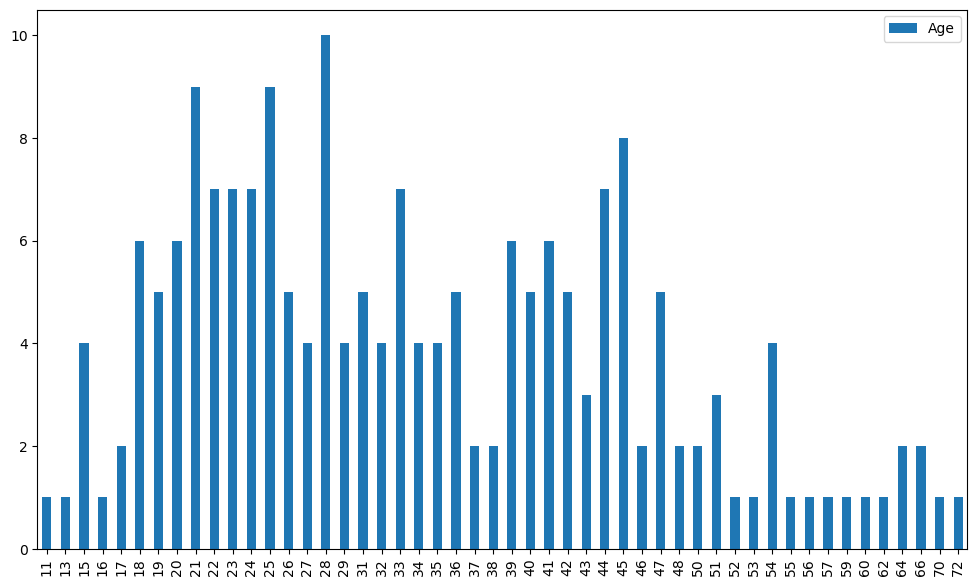

In [38]:
age_shooters.plot.bar(figsize=(12,7))

### Create age bracket in line with census data

In [39]:
renames_variables = [
    'Under 5 years old', '5 to 9 years', '10 to 14 years', '15 to 17 years', '18 and 19 years', '20 years', '21 years', '22 to 24 years', '25 to 29 years',
    '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 and 61 years', '62 to 64 years', '65 and 66 years',
    '67 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 years and over'
]

bins = [0, 5, 9, 14, 17, 19, 20, 21, 24, 29, 34, 39, 44, 49, 54, 59, 61, 64, 66, 69, 74, 79, 84, 100]
group_names = renames_variables

shooters_df["Age Bracket"] = pd.cut(shooters_df["Age"], bins, labels = group_names, include_lowest = True)
shooters_df[['Age', 'Age Bracket']].head()

,Age,Age Bracket
0,25,25 to 29 years
1,18,18 and 19 years
2,39,35 to 39 years
3,56,55 to 59 years
4,31,30 to 34 years


In [40]:
stat_age_df = get_distribution(shooters_df, 'Age Bracket', 0)
stat_age_df

,Age Bracket,Percent
25 to 29 years,32,16.580311
40 to 44 years,26,13.471503
22 to 24 years,21,10.880829
30 to 34 years,20,10.362694
35 to 39 years,19,9.844560
45 to 49 years,17,8.808290
18 and 19 years,11,5.699482
50 to 54 years,11,5.699482
21 years,9,4.663212
15 to 17 years,7,3.626943


In [41]:
male_age_census_pd = pd.read_csv('clean_data/clean_male_population_age.csv')

state = 'CA'

state_data = male_age_census_pd.loc[male_age_census_pd['state']==state,:]
state_data = state_data.reset_index()

state_data_percent = state_data.drop(columns='index')

for b in renames_variables:
    state_data_percent.loc[0,b] = 100*state_data.loc[0,b]/state_data.loc[0,'Total Population']

state_data_percent

,Under 5 years old,5 to 9 years,10 to 14 years,15 to 17 years,18 and 19 years,20 years,21 years,22 to 24 years,25 to 29 years,30 to 34 years,...,60 and 61 years,62 to 64 years,65 and 66 years,67 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,state,Total Population
0,6.106606,6.320033,6.909288,4.02057,2.688266,1.416985,1.369191,4.061237,7.801799,7.700526,...,2.448691,3.26487,1.974329,2.580227,3.465347,2.144628,1.387554,1.380452,CA,19714044.0


In [42]:
prospect_age_range = '25 to 29 years'

probability_anyone_in_range = state_data_percent['25 to 29 years'].values[0]
probability_shooter_in_range = stat_age_df.loc[prospect_age_range,'Percent']

probability_shooter_in_range


16.580310880829014

In [43]:
print(f"Someone that is in age bracket '{prospect_age_range}' is {probability_shooter_in_range/probability_anyone_in_range:.2f}x more likely to commit a mass shooting.")

Someone that is in age bracket '25 to 29 years' is 2.13x more likely to commit a mass shooting.


## Interest in firearms

In [44]:
stat_df = get_distribution(shooters_df, 'Interest in Firearms', codebook.codes_shooter_other_interest)
stat_df

,Interest in Firearms,Percent
No evidence,125,64.766839
Yes,68,35.233161


## Criminal Record

In [45]:
stat_df = get_distribution(shooters_df, 'Criminal Record', codebook.codes_shooter_crime_record)
stat_df

,Criminal Record,Percent
Yes,107,55.440415
No evidence,86,44.559585


## History of Physical Altercations

In [46]:
stat_df = get_distribution(shooters_df, 'History of Physical Altercations', codebook.codes_shooter_crime_physical)
stat_df

,History of Physical Altercations,Percent
No evidence,131,67.875648
Yes,55,28.497409
Attacked inanimate objects during arguments,7,3.626943


## Highest Level of Justice System Involvement

In [47]:
stat_df = get_distribution(shooters_df, 'Highest Level of Justice System Involvement', codebook.codes_shooter_crime_justice)
stat_df

,Highest Level of Justice System Involvement,Percent
NA,74,38.341969
Convicted,67,34.715026
Arrested,22,11.398964
Suspected,17,8.808290
Charged,13,6.735751


## Gang

In [48]:
field = shooters_df.columns[33]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Gang Affiliation,Percent
0,190,98.445596
1,3,1.554404


In [49]:
field = shooters_df.columns[34]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Terror Group Affiliation,Percent
0,183,94.818653
1,10,5.181347


In [50]:
field = shooters_df.columns[35]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Known Hate Group or Chat Room Affiliation,Percent
0,164,84.974093
1,14,7.253886
3,7,3.626943
4,5,2.590674
2,2,1.036269
"1, 4",1,0.518135


In [51]:
field = shooters_df.columns[36]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Violent Video Games,Percent
No evidence,106,54.922280
NA (pre-1992),44,22.797927
Yes,28,14.507772
Played unspecified video games,15,7.772021


In [52]:
# Is a bully
field = shooters_df.columns[37]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Bully,Percent
0.0,153,79.274611
1.0,40,20.725389


In [53]:
# Was bullied
field = shooters_df.columns[38]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Bullied,Percent
0.0,158,81.865285
1.0,35,18.134715


In [54]:
# Childhood trauma
field = shooters_df.columns[43]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Childhood Trauma,Percent
0,127,65.803109
1,66,34.196891


In [55]:
# Abused
field = shooters_df.columns[44]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Physically Abused,Percent
0.0,173,89.637306
1.0,20,10.362694


In [56]:
field = shooters_df.columns[45]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Sexually Abused,Percent
0,182,94.300518
1,11,5.699482


In [57]:
field = shooters_df.columns[46]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Emotionally Abused,Percent
0,170,88.082902
1,23,11.917098


## Socioeconomic background

In [58]:
field = shooters_df.columns[48]
stat_df = get_distribution(shooters_df, field, codebook.codes_shooter_trauma_ses)
stat_df

,Childhood SES,Percent
Middle class,64,33.160622
Lower class,57,29.533679
Unknown,55,28.497409
Upper class,17,8.808290


In [59]:
# Parental criminal record
field = shooters_df.columns[51]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Parent Criminal Record,Percent
0,174,90.15544
1,19,9.84456


In [60]:
field = shooters_df.columns[52]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Family Member Incarcerated,Percent
0,183,94.818653
1,10,5.181347


In [61]:
# Adult trauma
field = shooters_df.columns[53]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Adult Trauma,Percent
0,158,81.865285
1,15,7.772021
6,7,3.626943
4,4,2.072539
2,3,1.554404
3,3,1.554404
5,2,1.036269
"1, 3",1,0.518135


In [62]:
# recent stressor
field = shooters_df.columns[54]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Recent or Ongoing Stressor,Percent
0,55,28.497409
2,47,24.352332
1,14,7.253886
"1, 2",14,7.253886
6,12,6.217617
4,6,3.108808
5,6,3.108808
3,6,3.108808
"2, 5",6,3.108808
"2, 3",5,2.590674


# Parameters for cooloff period

In [63]:
field = shooters_df.columns[54]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Recent or Ongoing Stressor,Percent
0,55,28.497409
2,47,24.352332
1,14,7.253886
"1, 2",14,7.253886
6,12,6.217617
4,6,3.108808
5,6,3.108808
3,6,3.108808
"2, 5",6,3.108808
"2, 3",5,2.590674


In [64]:
field = shooters_df.columns[55]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Signs of Being in Crisis,Percent
1,156,80.829016
0,37,19.170984


In [65]:
field = shooters_df.columns[56]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Timeline of Signs of Crisis,Percent
3.0,65,33.678756
2.0,47,24.352332
-1.0,36,18.652850
1.0,23,11.917098
0.0,22,11.398964


In [66]:
field = shooters_df.columns[60]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Rapid Mood Swings,Percent
0,138,71.502591
1,55,28.497409


In [67]:
field = shooters_df.columns[61]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Increased Agitation,Percent
1,129,66.839378
0,64,33.160622


In [68]:
# Abusive behavior
field = shooters_df.columns[62]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Abusive Behavior,Percent
0,110,56.994819
1,83,43.005181


In [69]:
field = shooters_df.columns[63]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Isolation,Percent
0,114,59.067358
1,79,40.932642


In [70]:
field = shooters_df.columns[64]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Losing Touch with Reality,Percent
0,129,66.839378
1,64,33.160622


In [71]:
# Paranoia
field = shooters_df.columns[65]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Paranoia,Percent
0,143,74.093264
1,50,25.906736


In [72]:
# Suicide
field = shooters_df.columns[66]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Suicidality,Percent
2,73,37.823834
1,62,32.124352
0,58,30.051813


In [73]:
field = shooters_df.columns[71]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Psychiatric Medication,Percent
0.0,149,77.202073
1.0,44,22.797927


In [74]:
field = shooters_df.columns[73]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Treatment 6 Months Prior to Shooting,Percent
0,157,81.34715
1,36,18.65285


In [75]:
field = shooters_df.columns[76]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Known Family Mental Health History,Percent
0,161,83.419689
1,21,10.880829
2,10,5.181347
"1, 2",1,0.518135


### Autism
- https://www.cdc.gov/ncbddd/autism/data.html
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9128411/#:~:text=State%20prevalence%20estimates%20ranged%20from,)%20and%20Florida%20(329%2C131).

In [85]:
field = shooters_df.columns[77]
stat_df = get_distribution(shooters_df, field, codebook.codes_shooter_health_autism)
stat_df

,Autism Spectrum,Percent
No evidence,181,93.782383
Diagnosed or extremely likely,12,6.217617


In [77]:
# Drugs
field = shooters_df.columns[78]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Substance Use,Percent
0,113,58.549223
1,24,12.435233
3,17,8.808290
2,12,6.217617
"1, 3",8,4.145078
"1, 2, 3",8,4.145078
"1, 2",7,3.626943
"2, 3",3,1.554404
"2,3",1,0.518135


In [78]:
field = shooters_df.columns[80]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Head Injury / Possible TBI,Percent
0,178,92.227979
1,15,7.772021


In [79]:
# PRejudices
field = shooters_df.columns[81]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Known Prejudices,Percent
0,127,65.803109
1,20,10.362694
2,15,7.772021
"1, 4",7,3.626943
3,4,2.072539
4,4,2.072539
"2, 4",3,1.554404
"1, 3, 4",3,1.554404
"1, 2, 4",3,1.554404
"1, 3",2,1.036269


In [80]:
field = shooters_df.columns[82]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Interest in Firearms,Percent
No evidence,125,64.766839
Yes,68,35.233161


In [81]:
field = shooters_df.columns[83]
stat_df = get_distribution(shooters_df, field, codebook.codes_shooter_other_proficiency)
stat_df

,Firearm Proficiency,Percent
Some experience,59,30.569948
Very experienced,58,30.051813
No experience,44,22.797927
More experienced,30,15.544041
Unknown,2,1.036269


# Get any stat

In [82]:
field = shooters_df.columns[84]
stat_df = get_distribution(shooters_df, field, 0)
stat_df

,Age Bracket,Percent
25 to 29 years,32,16.580311
40 to 44 years,26,13.471503
22 to 24 years,21,10.880829
30 to 34 years,20,10.362694
35 to 39 years,19,9.844560
45 to 49 years,17,8.808290
18 and 19 years,11,5.699482
50 to 54 years,11,5.699482
21 years,9,4.663212
15 to 17 years,7,3.626943


# DataFrame with analysed metrics

In [86]:
shooter_profile = shooters_df[
        [
        'Gender',
        'Race',
        'Religion',
        'Immigrant',
        'Mental Illness',
        'Notably Depressed Mood',
        'Military Service',
        'Military Branch',
        'Violent Video Games',
        'School Performance',
        'Employment Status',
        'Age Bracket',
        'History of Physical Altercations',
        'Highest Level of Justice System Involvement',
        'History of Domestic Abuse',
        'History of Sexual Offenses',
        'Autism Spectrum'
        ]]

In [87]:
shooter_profile

,Gender,Race,Religion,Immigrant,Mental Illness,Notably Depressed Mood,Military Service,Military Branch,Violent Video Games,School Performance,Employment Status,Age Bracket,History of Physical Altercations,Highest Level of Justice System Involvement,History of Domestic Abuse,History of Sexual Offenses,Autism Spectrum
0,Male,White,Christian,No,1,Yes,Yes,Marines,NA (pre-1992),Poor,0,25 to 29 years,No evidence,Convicted,1,0,No evidence
1,Male,White,None,No,2,No evidence,No,NA,NA (pre-1992),Good,0,18 and 19 years,No evidence,NA,0,0,No evidence
2,Male,White,Christian,No,4,No evidence,Yes,Army,NA (pre-1992),Unknown,1,35 to 39 years,Yes,Suspected,0,0,No evidence
3,Male,White,None,No,0,No evidence,No,NA,NA (pre-1992),Unknown,1,55 to 59 years,No evidence,NA,0,0,No evidence
4,Male,Black,Christian,No,2,No evidence,Yes,Air Force,NA (pre-1992),Good,0,30 to 34 years,No evidence,NA,3,0,No evidence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Male,Asian,None,Yes,0,No evidence,No,NA,No evidence,Unknown,0,70 to 74 years,No evidence,Arrested,0,0,No evidence
189,Male,Asian,None,Yes,0,No evidence,No,NA,No evidence,Unknown,1,65 and 66 years,Yes,NA,0,0,No evidence
190,Transgender,White,Christian,No,1,Yes,No,NA,No evidence,Good,1,25 to 29 years,No evidence,NA,0,0,Diagnosed or extremely likely
191,Male,White,None,No,1,No evidence,No,NA,No evidence,Unknown,1,25 to 29 years,No evidence,NA,0,0,No evidence
